<a href="https://colab.research.google.com/github/adriansanchezroy/SecWebsite/blob/main/3_Fonctions_d'ordre_sup%C3%A9rieur_et_objets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration
---------------

Les cellules de cette section doivent être exécutées avant le reste du document. Si vous êtes déconnecté de l'engin de exécution par Google Colab, il vous faudra exécuter cette section de nouveau.

In [ ]:
!pip3 install classroom-extensions

In [ ]:
%load_ext classroom_extensions.web

In [ ]:
%load_ext classroom_extensions.plantuml

# Fonctions d'ordre supérieur
----------

* Dans le contexte de la programmation, les *abstractions* cachent des détails et nous donnent la possibilité de parler de problèmes à un niveau supérieur (ou plus abstrait). Nous regarderons deux types d'abstractions possibles en JavaScript:

  - Les fonctions d'ordre supérieur.
  - La programmation orienté objet.

* Les fonctions d'ordre supérieur en JavaScript sont un concept fondamental dans la programmation fonctionnelle. Elles permettent de traiter les fonctions de la même manière que les données, en les passant en tant qu'arguments ou en les retournant comme résultats.

### Abstraction de répétition d'une action

* Avant de regarder des exemples d'usage des fonctions d'ordre supérieur, regardons un exemple sur comment abstraire l'exécution répétitive d'une action.Le code ci-dessous execute `console.log` plusieurs fois:

In [ ]:
%%javascript

for (let i = 0; i < 5; i++) {
  console.log(i);
}

<classroom_extensions.web.JavascriptWithConsole object>

* Si on a besoin d'exécuter ce code un nombre *n* de fois, il peut être encapsulé par une fonction:

In [ ]:
%%javascript

function repeatLog(n) {
  for (let i = 0; i < n; i++) {
    console.log(i);
  }
}

repeatLog(5);

<classroom_extensions.web.JavascriptWithConsole object>

* Mais si on veut exécuter une autre action plusieurs fois, nous pouvons créer une fonction qui accepte une autre fonction en argument:

In [ ]:
%%javascript

function repeat(n, action) {
  for (let i = 0; i < n; i++) {
    action(i);
  }
}

repeat(5, console.log);

<classroom_extensions.web.JavascriptWithConsole object>

* On peut même déclarer une fonction dans l'appel de la fonction `repeat`:

In [ ]:
%%javascript

function repeat(n, action) {
  for (let i = 0; i < n; i++) {
    action(i);
  }
}

let values = [];

repeat(5, i => values.push(`Valeur: ${i + 1}`));

console.log(values);

<classroom_extensions.web.JavascriptWithConsole object>

* En fait, les tableaux fournissent une méthode, `forEach()`, qui permet de parcourir un tableau et exécuter une fonction sur ses éléments:

In [ ]:
%%javascript

const fruits = ['pomme', 'banane', 'orange'];

fruits.forEach(fruit => console.log(fruit));

<classroom_extensions.web.JavascriptWithConsole object>

* Les fonctions de rappel sont des fonctions passées en tant qu'arguments à d'autres fonctions pour être exécutées ultérieurement. Elles sont souvent utilisées dans des opérations asynchrones, comme dans le cas de `setTimeout()`:

In [ ]:
%%javascript

function doSomething(callback) {
  console.warn("En train de faire quelque chose...");
  callback();
}

function onComplete() {
  console.log("Opération finalisée.");
}

doSomething(onComplete);

<classroom_extensions.web.JavascriptWithConsole object>

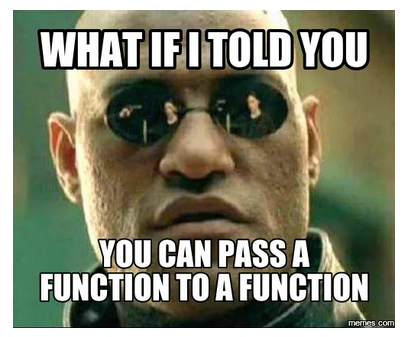

### Utilité des fonctions d'ordre supérieur

* Passer des fonctions en tant qu'arguments à d'autres fonctions ouvre la voie à des méthodes puissantes pour manipuler et transformer des données de manière élégante et concise:
  * Pas besoin d'encapsuler la fonction dans un objet.
  * Les fonctions peuvent prendre un nombre variable d'arguments. Il est possible d'utiliser les appels indirects tels que `f.apply()` (`f` étant une fonction) et les arguments variadiques.
  * Possible d'intégrer des comportements de type *plug-and-play* où une fonction donnée effectue quelque chose selon la fonction passée en argument (ex.,  filtrage de tableau, transformations, etc).
  * Possibilité de retourner des fonctions et de créer des *fermetures*, tel que nous l'avons vu dans le cahier précédent.

### Filtrage et transformations des tableaux

* Les tableaux en JavaScript offrent plusieurs méthodes telles que `filter()`, `map()` et `reduce()` qui acceptent une fonction utilisée pour filtrer ou pour transformer les éléments d'un tableau.

* La méthode `filter()` ne modifie pas le tableau. Elle renvoie un nouveau tableau avec les éléments qui ont passé le filtre fourni.

In [ ]:
%%javascript

let values = [85, 95, 87, 40, 55, 72, 55];

console.log(values.filter( v => v > 70));

<classroom_extensions.web.JavascriptWithConsole object>

* La méthode `map()` dans l'exemple ci-dessous transforme un tableau en appliquant une fonction à tous ses éléments et en créant un nouveau tableau à partir des valeurs renvoyées.

* Le nouveau tableau aura la même longueur que le tableau d'entrée, mais son contenu aura été mappé à une nouvelle forme par la fonction.

<!--
%%javascript

function map(array, transform) {
  let result = [];
  array.forEach( elem => result.push(transform(elem)) );
  return result;
}

let mapped = map( [3, 1, 5, 7, 2], num => num + 10 );
console.log(mapped);
-->

In [ ]:
%%javascript

const numbers = [1, 2, 3, 4];
const doubled = numbers.map(num => num * 2);

console.log(doubled); // 2, 4, 6, 8

let mapped = [3, 1, 5, 7, 2].map(n => n + 10);
console.log(mapped);  // 13,11,15,17,12

// const other[];
// numbers.forEach(n => other.push(n + 10));

<classroom_extensions.web.JavascriptWithConsole object>

* On peut aussi calculer une seule valeur à partir d'un tableau à l'aide de `reduce()`:

In [ ]:
%%javascript

let values = [1, 2, 3, 4];
let reduced = values.reduce((a, b) => a + b, 0);

console.log(reduced);  // 10

<classroom_extensions.web.JavascriptWithConsole object>

# Activités en classe
----------

## Utilisation d'une fonction en tant qu'argument

* Créez une fonction `calculate()` qui prend deux nombres et une fonction de calcul en tant qu'arguments.

* La fonction `calculate()` doit appeler la fonction de calcul avec les deux nombres et renvoyer le résultat:

<!--
function add(x, y) {
    return x + y;
}

function multiply(x, y) {
    return x * y;
}

function calculate(x, y, operation) {
    return operation(x, y);
}

console.log(calculate(5, 3, add)); // Affiche : 8
console.log(calculate(5, 3, multiply)); // Affiche : 15
-->

In [ ]:
%%javascript

// Complétez le code...
function add(x, y) {
    return x + y;
}

function multiply(x, y) {
    return x * y;
}

function calculate(x, y, operation) {
    return operation(x, y);
}

console.log(calculate(5, 3, add));        // Affiche : 8
console.log(calculate(5, 3, multiply));   // Affiche : 15

<classroom_extensions.web.JavascriptWithConsole object>

## Filtrage et transformation

* Créez un tableau d'objets représentant des étudiants avec leurs noms et leurs notes:
```javascript
const students = [
    { name: 'Éléonore', score: 85 },
    { name: 'Antoine', score: 70 },
    { name: 'Camille', score: 95 },
    { name: 'Léa', score: 60 }
];
```

* Utilisez `filter()` pour obtenir un tableau contenant uniquement les étudiants ayant obtenu une note supérieure ou égale à `80`.

* Ensuite, utilisez `map()` pour créer un nouveau tableau contenant les noms des étudiants sélectionnés.

<!--
const students = [
    { name: 'Éléonore', score: 85 },
    { name: 'Antoine', score: 70 },
    { name: 'Camille', score: 95 },
    { name: 'Léa', score: 60 }
];

const topStudents = students
    .filter(student => student.score >= 80)
    .map(student => student.name);

console.log(topStudents); // Affiche : ['Alice', 'Charlie']
-->

In [ ]:
%%javascript

const students = [
  { name: 'Éléonore', score: 85 },
  { name: 'Antoine', score: 70 },
  { name: 'Camille', score: 95 },
  { name: 'Léa', score: 60 }
];

// Complétez le code...
const topStudents = students
    .filter(student => student.score >= 80)
    .map(student => student.name);

console.log(topStudents); // Affiche : ['Éléonore', 'Camille']

<classroom_extensions.web.JavascriptWithConsole object>

## Réduction

* Créez un tableau d'objets représentant des transactions avec des montants positifs et négatifs :
```javascript
const transactions = [
    { amount: 200 },
    { amount: -50 },
    { amount: 300 },
    { amount: -75 }
];
```

* Utilisez `reduce()` pour calculer le solde total en prenant en compte toutes les transactions.
* Affichez le solde total sous forme positive ou négative.

<!--
const transactions = [
    {amount: 200},
    {amount: -50},
    {amount: 300},
    {amount: -75}
];

const totalBalance = transactions.reduce((acc, transaction) => acc + transaction.amount, 0);

console.log(`Solde total : ${totalBalance >= 0 ? '+' : '-'}${Math.abs(totalBalance)}`);

-->

In [ ]:
%%javascript

const transactions = [
  { amount: 200 },
  { amount: -50 },
  { amount: 300 },
  { amount: -75 }
];

// Complétez le code...
const totalBalance = transactions.reduce((acc, transaction) => acc + transaction.amount, 0);

console.log(`Solde total : ${totalBalance >= 0 ? '+' : '-'}${Math.abs(totalBalance)}`);

<classroom_extensions.web.JavascriptWithConsole object>

## Concaténer des tableaux

Utilisez la méthode `reduce` en combinaison avec la méthode `concat` des tableaux pour concaténer un tableau de tableaux en un seul tableau contenant tous les éléments des tableaux d'origine.

<!--

const merge = (arrays) => arrays.reduce((prev, cur) => prev.concat(cur), []);

-->

<!--

console.log(arr1.concat(arr2));

let values = [1, 2, 3, 4, 5];
// 1 + 2 = 3
// 3 + 3 = 6
// 6 + 4 = 10
// 10 + 5 = 15
console.log(values.reduce( (a, b) => a + b ));

let arrays = [[1, 2], [3, 4, 5], [6], [7, 8, 9]];
const merge = (arrays) => arrays.reduce((prev, cur) => prev.concat(cur), []);

-->

In [ ]:
%%javascript

let arrays = [[1, 2], [3, 4, 5], [6], [7, 8 , 9]];

// Complétez le code (fonction merge)...
const merge = (arrays) => arrays.reduce((prev, cur) => prev.concat(cur), []);

console.log(merge(arrays));
// [1, 2, 3, 4, 5, 6, 7, 8, 9]

<classroom_extensions.web.JavascriptWithConsole object>

# Objets
----------------

<img alt="" src="https://b1694534.smushcdn.com/1694534/wp-content/uploads/2021/06/0_fQTD4DjK71YMUtIS.gif?lossy=1&strip=1&webp=1" width="350px" align="right"/>

* Les objets en JavaScript sont des structures de données fondamentales qui permettent de regrouper des valeurs et des fonctionnalités associées. Un objet est un ensemble de paires nom-valeur, où chaque nom est une chaîne (ou un symbole) unique et chaque valeur peut être de n'importe quel type de données, y compris d'autres objets.
    
* Ne sont pas des objets :
  * Les types primitifs, tels que les nombres, valeurs booléennes, chaînes, etc.
  * `null` et `undefined` - il s'agit de types spéciaux

* De nombreux langages permettent de différencier propriétés publiques et privées (**encapsulation**), empêchant l'accès externe aux propriétés privées. Contrairement à cela, JavaScript n'adopte pas encore cette distinction, mais les développeurs utilisent des conventions pour mettre en œuvre cette idée.

* Exemple de création d'objets avec la **notation littérale**:

In [ ]:
%%javascript

// Initialisation d'un objet vide
let empty = {};

// Objet avec deux attributs
let objName = {
	firstName: "Véronique",
	lastName: "Janvier"
};

console.log(objName["firstName"]);
console.log(objName.firstName);

console.log(objName["lastName"]);
console.log(objName.lastName);

<classroom_extensions.web.JavascriptWithConsole object>

* Tel qu'on l'a vu dans le cahier antérieur, pour obtenir la valeur d'une propriété d'un objet, on utilise le point `.` ou des crochets `[ ]`, comme dans le cas d'un tableau associatif.

* Si on essaie de récupérer la valeur d'une propriété inexistante, tel que:
```javascript
let middlename = objName.middleName;
```
L'appel retournera `undefined`. L'utilisation de la variable `middlename` par la suite, créera une une exception de type `TypeError`:

In [ ]:
%%javascript

let objName = {
	firstName: "Véronique",
	lastName: "Janvier"
};

middleName = objName.middleName;
console.log("" + middleName);
middleName.slice(2); // TypeError

<classroom_extensions.web.JavascriptWithConsole object>

* Tel qu'on l'a vu aussi, ES2020 nous offre les accès conditionnels:

In [ ]:
%%javascript

let objName = {
	firstName: "Véronique",
	lastName: "Janvier"
};

objName?.middleName?.slice(2);

<classroom_extensions.web.JavascriptWithConsole object>

* Pour modifier la valeur d'une propriété d'un objet:

In [ ]:
%%javascript

let objName = {
	firstName: "Véronique",
	lastName: "Janvier"
};

objName.lastName = "Leclair";
console.log(objName);

<classroom_extensions.web.JavascriptWithConsole object>

* Si la propriété n'existe pas, elle sera simplement ajoutée à l'objet avec sa valeur, de manière similaire à l'ajout d'une clé dans un tableau associatif. En résumé, les objets en JavaScript fonctionnent de manière comparable aux tables de hachage.

### **Remarques:**
* En JavaScript, tous les objets sont passés par référence. Aucune copie n'est construite sauf si explicitement demandé. Les changements effectués dans une instance sont visibles instantanément dans toutes les instances (passage par référence).

## Méthodes

* Les méthodes d'un objet en JavaScript ne sont que des propriétés qui pointent vers l'implémentation d'une fonction.

In [ ]:
%%javascript

// Initialisation d'un objet vide
let kangaroo = {};

// Creation d'une proprieté / méthode
kangaroo.speak = function(line) {
  console.log(`Le kangourou dit: ${line}`);
};

kangaroo.speak("Je suis vivant.");

<classroom_extensions.web.JavascriptWithConsole object>

* Généralement, une méthode doit faire quelque chose avec l'objet sur lequel elle a été appelée. Lorsqu'une fonction est appelée en tant que méthode, la liaison `this` dans son corps pointe vers l'objet sur lequel la fonction a été appelée.

In [ ]:
%%javascript

function speak(line) {
  // this -> objet?
  console.log(`Le ${this.type} a dit: '${line}'`);
}

let wallaby  = {type: "wallaby", speak};
let redKangaroo = {type: "kangourou roux", speak};

wallaby.speak("Je saute!");

redKangaroo.speak("Je saute plus haut!");

<classroom_extensions.web.JavascriptWithConsole object>

* On peut considérer l’objet sur lequel la méthode est appelée comme un paramètre supplémentaire qui est passé d'une manière différente. Si on veut le passer explicitement, on peut utiliser la méthode `call` de la fonction:

In [ ]:
%%javascript

function speak(line) {
  // this -> objet?
  console.log(`Le ${this.type} a dit: '${line}'`);
}

let redKangaroo = {type: "kangourou roux"};

speak.call(redKangaroo, "Je saute plus haut!");

<classroom_extensions.web.JavascriptWithConsole object>

## Prototypes

* Regardez lé résultat d'exécution du code ci-dessous:

In [ ]:
%%javascript

let emptyObject = {};

console.log(emptyObject.toString);   // => [object Object]
console.log(emptyObject.toString());

<classroom_extensions.web.JavascriptWithConsole object>

* En plus de leurs propriétés, la majorité des objets JavaScript ont aussi un **prototype**.

* Le **prototype** est un autre objet utilisé comme une sorte de solution de secours pour les propriétés.

* Lorsqu'un objet reçoit une requête pour une propriété qu'il n'a pas, il cherchera la propriété dans son prototype, puis dans le prototype de son prototype, etc.

* Le prototype d'un objet vide est l'entité derrière la plupart des objets : `Object.prototype`

**Chaque objet a une proprieté spéciale "*privée*" conceptuellement appelée
`[[Prototype]]`**
 * Dans les navigateurs courants on peut y accéder via `objet.__proto__`
 * ou via `Object.getPrototypeOf(objet)` (syntaxe recommandée).

In [ ]:
%%javascript

console.log(Object.getPrototypeOf({}) == Object.prototype); // true
console.log("" + Object.getPrototypeOf(Object.prototype));

<classroom_extensions.web.JavascriptWithConsole object>

* `Object.prototype` offre quelques propriétés, telles que `toString()` pour créer une représentation en chaîne de caractères d'un objet.

* Plusieurs objets n'ont pas `Object.prototype` comme leur prototype direct, mais ils ont d'autres objets qui offrent une collection différente de propriétés.

* Par exemple, les fonctions utilisent `Function.prototype` comme prototype et les tableaux dérivent d'`Array.prototype`.

In [ ]:
%%javascript

console.log(Object.getPrototypeOf(Math.cos) == Function.prototype); //true
console.log(Object.getPrototypeOf([]) == Array.prototype); // true

<classroom_extensions.web.JavascriptWithConsole object>

* Même si plusieurs objets n'ont pas `Object.prototype` comme leur prototype direct, leur prototypes dérivent indirectement de `Object.prototype` et ils ont donc toutes les propriétés définies en `Object.prototype`.

* Regardez l'exemple :

In [ ]:
%%javascript

const protoKangaroo = {

  say(txt) {
    console.log(`Le ${this.type} kangourou dit: ${txt}`);
  }
}

// Création d'un objet dont [[Prototype]] est protoKangaroo
let boxingKangaroo = Object.create(protoKangaroo);

boxingKangaroo.type = "boxing";
boxingKangaroo.say("bonjour"); // méthode définie par le prototype

console.log(Object.getPrototypeOf(boxingKangaroo) == protoKangaroo);

<classroom_extensions.web.JavascriptWithConsole object>

* `say(txt)` est un raccourci pour définir une méthode d'un objet. Il crée une propriété et fournit une fonction comme sa valeur.
* Dans l'exemple, `protoKangaroo` sert comme un prototype pour tous les objets type kangourou.
* `boxingKangaroo` a des propriétés qui appartiennent aux boxing kangourous.

## Constructeurs

**Qu'en est-il des classes?**
* Même si c'est possible de spécifier des classes en JavaScript depuis [ES6](https://262.ecma-international.org/6.0/), elles ne sont pas des classes telles qu'on les connaît dans d'autres langages. Les classes en JavaScript restent une approche informelle autour du système prototypal.

* Vous allez remarquer que dans plusieurs cadriciels, plutôt que de définir une classe, souvent le type de l'objet est spécifié en écrivant une **fonction constructeur**.
   - Par convention, la première lettre du nom d'une fonction constructeur est en majuscules.
   - Le mot-clé `this` est utilisé dans la fonction constructeur pour initialiser les propriétés de l'objet.

* Appel de la fonction constructeur se fait avec l'opérateur `new`, et passage des valeurs à initialiser.

* L'opérateur `new` permet de créer une **instance** d'un objet défini via une fonction constructeur.
    - L'oubli de `new` peut avoir des effets indésirables au niveau des liaisons.


In [ ]:
%%javascript

const Person = function(firstName, lastName, title) {
  this.firstName= firstName;
  this.lastName = lastName;
  this.title = title;
};

let person = new Person("Geneviève", "Germain", "PhD");
console.log(person);

<classroom_extensions.web.JavascriptWithConsole object>

**Le mot-clé `this`**

* Une liaison (*binding*) vers l'objet lui-même, seulement valide à l'intérieur de l'objet, est automatiquement assignée par l'engin de JavaScript.

* Il est nécessaire d'utiliser `this` pour référencer les propriétés et les méthodes de l'objet.

* Le pointeur `this` peut être stocké dans une variable (nous verrons une utilisation de cela plus tard).

# Héritage prototypal
------------

* En JavaScript, un objet contient une référence à son ancêtre dans la hiérarchie d'héritage - le prototype de l'objet.

* Vu que les classes sont du sucre syntaxique pour faciliter l'héritage à l'aide des prototypes, il est donc important de bien comprendre le système prototypal de JavaScript.

## Quelques fonctionnalités clés qui permettent l'héritage

JavaScript possède quelques fonctionnalités qui permettent l'héritage appuyé sur un système de prototypes:

* L'accès à une propriété inexistante dans un objet JavaScript oblige l'engin JavaScript à rechercher la propriété dans le prototype de l'objet.
  - Par exemple, `person.toString()` entraîne l'utilisation de la méthode `toString()` du prototype de l'objet si l'objet lui-même ne contient pas une telle méthode.
  - La recherche se poursuit de manière récursive dans la chaîne de prototypes jusqu'à ce qu'une correspondance soit trouvée ou que la chaîne soit épuisée.

* L'usage d'une fonction constructeur `new Person()` crée un nouvel objet avec `[[Prototype]]` défini sur la valeur de `Person.prototype`. Cela permet de mettre en place une chaîne de prototypes pour de nouveaux objets.

* Si on appelle une fonction (méthode) d'un objet, la valeur de `this` est liée à l'objet sur lequel la méthode est appelée.

* Regardons un exemple:

In [ ]:
%%javascript

const Person = function(firstname, lastname) { // [[Prototype]]
	this.firstname = firstname;
	this.lastname = lastname;
}

Person.prototype.speak = function (msg) { // Person.prototype.[[Prototype]] -> Object.prototype
	console.log(`${this.firstname} ${this.lastname} dit: ${msg}`);
	// " " ->  this.firstname + " " + this.lastname + " dit: " + msg
	// ' ' ->  this.firstname + ' ' + this.lastname +  ' dit: ' + msg
	// ` ` ->  `${this.firstname} ${this.lastname} dit: ${msg}`
}

let person1 = new Person("Gérald", "Royer"); // person1.[[Prototype]] ou __proto__ -> Person.prototype
let person2 = new Person("Aimé", "Traver");  // person2.[[Prototype]] ou __proto__ -> Person.prototype

person1.speak("salut");
person2.speak("bonjour");

console.log(person1.toString());

<classroom_extensions.web.JavascriptWithConsole object>

* Une fonction constructeur `Person` est définie. La convention est de mettre en majuscule les noms de fonctions qui doivent être appelés avec `new` pour les différencier des autres fonctions.

* La fonction constructeur reçoit initialement un objet vide comme valeur de `this` et le code le remplit avec les propriétés `firstname` et `lastname` pour une utilisation ultérieure.

* Ensuite, une fonction est ajoutée à `Person.prototype` qui écrit le message qu'une personne veut donner. L'utilisation de `this` permet au même code de fonctionner sur plusieurs objets avec des valeurs différentes pour les variables.

* Enfin, des nouveaux objets `Person` appelés `person` et `person2` sont créés. Ils héritent de `Person.prototype` et nous permettent d'appeler `person1.say()` ou `person2.say()` pour afficher le message sur la console.

## Prototype d'un objet (`__proto__` ou `[[Prototype]]`) vs propriété `prototype`

* Le **prototype d'un objet**, `[[Prototype]]`, n'est pas la même chose que sa propriété **prototype**.
  - Le prototype d'un objet est utilisé lors de la recherche de propriétés inexistantes dans la chaîne de prototypes.
  - La propriété **prototype** est utilisée pour les objets créés avec `new`, et sera le prototype de l'objet nouvellement créé.
  * **Comprendre cette différence est important pour mieux comprendre la propriété `prototype` en JavaScript.**

* Dans notre exemple, `Person.prototype` sera le prototype utilisé pour les objets créés avec `new Person()` et le prototype de `Person` lui-même est en fait l'objet `Function.prototype` interne de JavaScript.

* Le prototype d'un objet est parfois appelée **liaison de prototype interne**. Il a également été historiquement appelé `__proto__`, et plus récemment `[[Prototype]]`. Pour obtenir le prototype d'un objet, on doit utiliser `Object.getPrototypeOf()`.

#### **Remarques:**

  - La notation `unObjet.[[Prototype]]` est utilisée pour désigner le prototype de l'objet `unObjet`. Cette propriété `[[Prototype]]` est accessible à l'aide des méthodes `Object.getPrototypeOf()` et `Object.setPrototypeOf()`.
  - La propriété `prototype` des fonctions est utilisée pour définir le `[[Prototype]]` à affecter aux instances des objets créés par cette fonction lorsqu'elle est utilisée comme constructeur ou par la méthode `Object.create()`.

In [ ]:
%%javascript

let person1 = { // [[Prototype]] -> Object.prototype
  firstname: "Aimé",
  lastname: "Traver"
};

const Person = function(firstname, lastname) { // Person.[[Prototype]] -> Function.prototype
	this.firstname = firstname;
	this.lastname = lastname;
};

let person2 = new Person("Gérald", "Royer"); // person2.[[Prototype]] -> Person.prototype

console.log(Object.getPrototypeOf(person1) == Object.prototype);          // true
console.log(Object.getPrototypeOf(person2) == Object.prototype);          // false
console.log(Object.getPrototypeOf(person2) == Person.prototype);          // true
console.log(Object.getPrototypeOf(Person) == Function.prototype);         // true
console.log(Object.getPrototypeOf(Person.prototype) == Object.prototype); // true

<classroom_extensions.web.JavascriptWithConsole object>

C'est important de retenir :

* Le `[[Prototype]]` d'un objet créé avec la syntaxe `{}` ou avec `new Object()` est `Object.prototype`.
* Pour un objet créé avec l'opérateur `new` et une fonction constructeur (ex. `Person`), la propriété `[[Prototype]]` de l'objet pointe vers la proprieté `prototype` de la fonction constructeur (ex. `Person`).

## Création d'objets au moyen d'`Object.create()`

* `Object.create(prototype)` crée un nouvel objet en lui assignant un `[[Prototype]]` donné et un ensemble initial de propriétés.
 - Pas de fonction constructeur.
 - Le paramètre `prototype` doit être `null` ou un objet. Sinon, l'exception `TypeError` est déclenchée.

In [ ]:
%%javascript

const Person = function(firstname, lastname) {
	this.firstname = firstname;
	this.lastname = lastname;
};

let person = Object.create(Person.prototype, {
    firstname: {
      value: "Seraphine",
      enumerable: true
    },
    lastname: {
      value: "Gardinier",
      enumerable: true
    }
});

console.log(person);

### Types de propriétés d’objet

* Les propriétés d'un objet peuvent être configurées pour avoir les attributs suivants (ou non):
    - `enumerable`: s'affiche ou non lors de l'énumération (`for.. in`).
    - `configurable`: peut être retirée via `delete`, et peuvent être modifiées après la création.
    - `writeable`: peut être modifiée après la création.
* Par défaut, toutes les propriétés sont `enumerable`, `configurable` et `writeable`.

**Exemples:**

```javascript
const emp = Object.create(Employee, {
  title: {
    value: "Manager",
    enumerable: true,
    configurable: true,
    writable: false
  }
});

emp.title = "Superviseur";
```

```javascript
const emp = Object.create(Employee);
Object.defineProperty(emp, "title", {
  value: "Manager",
  enumerable: true,
  configurable: true,
  writable: false
});
```

## Modification du prototype d'une fonction

* Le `prototype` d'une fonction constructeur est lui-même un objet et il peut également être modifié.
* Il est possible d'ajouter des propriétés à un `prototype`:
  - Les propriétés deviennent instantanément visibles dans tous les objets dont leur `[[Prototype]]` pointe vers la propriété `prototype` de la fonction, même si des objets ont été créés avant l'ajout.

In [ ]:
%%javascript

function Kangaroo(type) {
  this.type = type;
}

let boxingKangaroo = new Kangaroo("boxing"); // boxingKangaroo.[[Prototype]] -> Kangaroo.prototype
let redKangaroo = new Kangaroo("red"); // redKangaroo.[[Prototype]] -> Kangaroo.prototype

/* Propriété/fonction ajoutée a prototype de la fonction constructeur après
la création des objects. La propriété [[Prototype]] des objects pointe vers
la proprieté prototype de la fonction constructeur Kangaroo */

Kangaroo.prototype.say = function (txt) {
  console.log(`Le ${this.type} kangourou dit: ${txt}`);
}

boxingKangaroo.say("Bonjour !");
redKangaroo.say("Salut !");

// Ajout de la fonction jump() à boxingKangaroo.[[Prototype]] -> Kangaroo.prototype
Object.getPrototypeOf(boxingKangaroo).jump = function () {
  console.log(`Le ${this.type} kangourou saute ${this.type == "red" ? "très haut !" : "!"}`);
};

boxingKangaroo.jump();

// Cela va marcher aussi car boxingKangaroo et redKangaroo partagent le même prototype
redKangaroo.jump();

<classroom_extensions.web.JavascriptWithConsole object>

## Chaîne de prototypes

En cherchant une propriété d'un objet `obj`, si la propriété n'est pas définie dans l'objet lui-même, l'engin JavaScript exécute l'algorithme suivant:

1. L'engin JavaScript regarde le `[[Prototype]]` de l'objet.
2. Si la propriété existe dans le `[[Prototype]]` de l'objet, la propriété est retournée.
3. Sinon, la vérification s'effectue récursivement (ex., `obj.[[Prototype]].[[Prototype]]`, etc.), jusqu'à ce que le `[[Prototype]]` ne soit `Object.prototype` (haut de la hiérarchie).
4. Si la propriété n’est pas trouvée dans `Object.prototype`, retourner `undefined`.

Illustration de la chaîne de prototypes de l'exemple ci-dessus :

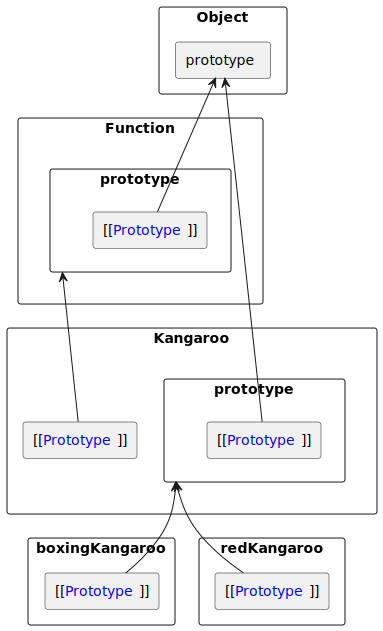

In [ ]:
%%plantuml
' Code plantuml pour créer le diagrama prototypal

rectangle Object {
  rectangle prototype as po
}

rectangle Function {
  rectangle prototype as pf {
      rectangle "[[[[Prototype]]]]" as ppf
  }
}

rectangle Kangaroo {
  rectangle "[[[[Prototype]]]]" as ppk
  rectangle prototype as pk {
      rectangle "[[[[Prototype]]]]" as pppk
  }
}

rectangle boxingKangaroo {
  rectangle "[[[[Prototype]]]]" as ppbk
}

rectangle redKangaroo {
  rectangle "[[[[Prototype]]]]" as pprk
}

po <-- ppf
pf <-- ppk
po <-- pppk
pk <-- ppbk
pk <-- pprk

## Exemple d'héritage par prototypes

Nous définissons une fonction constructeur `Employee` dont le
prototype est enchaîné au prototype de la fonction constructeur de
`Person` afin d'introduire une relation d'héritage.

In [ ]:
%%javascript

const Person = function(firstname, lastname) {
	this.firstname = firstname;
	this.lastname = lastname;
};

Person.prototype.speak = function (msg) {
	console.log(`${this.firstname} ${this.lastname} dit: ${msg}`);
}

const Employee = function(firstname, lastname, title) {
	Person.call(this, firstname, lastname);
	this.title = title;
};

// Pourquoi doit on faire cela?
Employee.prototype = Object.create(Person.prototype);
// Employee.prototype = Person.prototype;
Employee.prototype.constructor = Employee;

let emp = new Employee("Rolande", "Droit", "Dr.");
emp.speak("Bonsoir!");

### Version correcte

```javascript
Employee.prototype = Object.create(Person.prototype);
Employee.prototype.constructor = Employee;
```

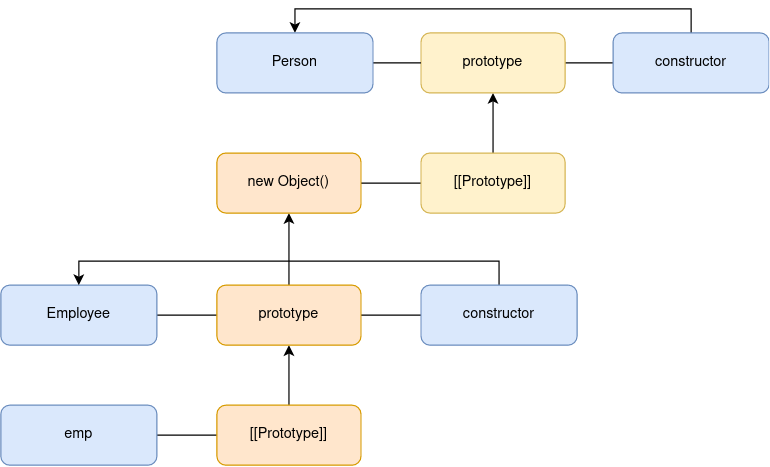

### Version incorrecte (pourquoi?)

```javascript
Employee.prototype = Person.prototype;
Employee.prototype.constructor = Employee;
```

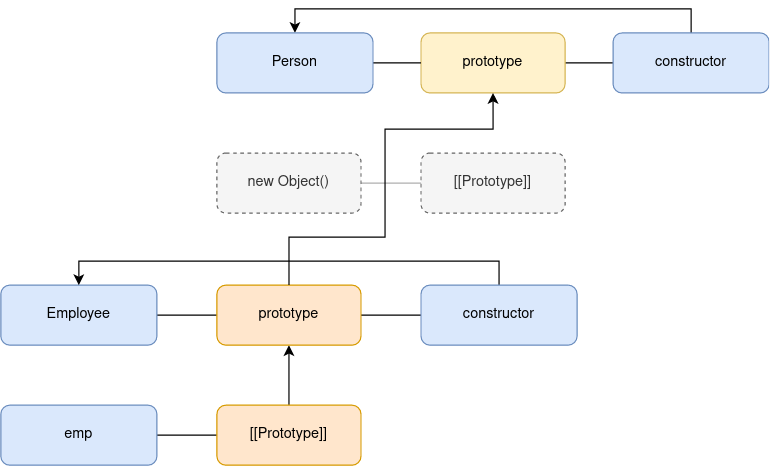

# Activités en classe
-----------

## Heritage par prototypes

1. Construisez la hiérarchie de classes suivante en utilisant l'héritage par pseudo-classes (fonctions constructeurs).
   - Ajoutez une méthode `area()` et une méthode `toString()` pour tous les objets.
   - Invoquer les méthodes parentes lorsque pertinent, au moyen de
`call() / apply()` (comme lors de l'invocation du constructeur parent).
2. Ensuite, dessinez le schéma prototypal correspondant à cet exemple (comme nous l'avons fait pour l’exemple `Employee/Person`).

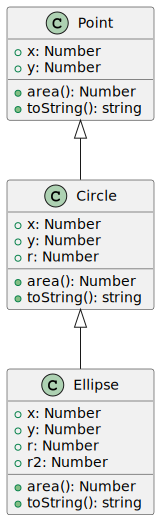

In [ ]:
%%plantuml

class Point {
    +x: Number
    +y: Number
    +area(): Number
    +toString(): string
}

class Circle {
    +x: Number
    +y: Number
    +r: Number
    +area(): Number
    +toString(): string
}

class Ellipse {
    +x: Number
    +y: Number
    +r: Number
    +r2: Number
    +area(): Number
    +toString(): string
}

Point <|-- Circle
Circle <|-- Ellipse

<!--
const Point = function (x, y) {
    this.x = x;
    this.y = y;

    this.area = function () {
        return 0;
    }
};

Point.prototype.toString = function () {
    return `Point(${this.x}, ${this.y})`;
}

const Circle = function (x, y, r) {
    Point.call(this, x, y);
    this.r = r;

    this.area = function () {
        return Math.PI * this.r * this.r;
    }
};

Circle.prototype = Object.create(Point.prototype);
Circle.prototype.constructor = Circle;

Circle.prototype.toString = function () {
    return `Circle(${this.x}, ${this.y}, ${this.r})`;
}

const Ellipse = function (x, y, r1, r2) {
    Circle.call(this, x, y, r1);
    this.r2 = r2;

    this.area = function () {
        return Math.PI * this.r * this.r2;
    }
}

Ellipse.prototype = Object.create(Circle.prototype);
Ellipse.prototype.constructor = Ellipse;

Ellipse.prototype.toString = function () {
    return `Ellipse(${this.x}, ${this.y}, ${this.r}, ${this.r2})`;
}
-->

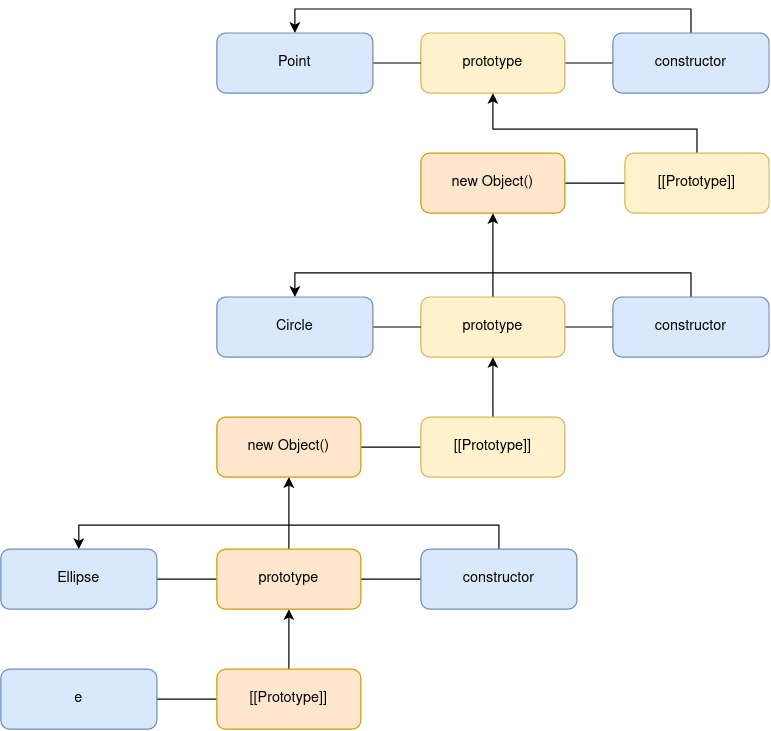

In [ ]:
%%javascript

// Complétez le code...
const Point = function (x, y) {
    this.x = x;
    this.y = y;

    this.area = function () {
        return 0;
    }
};

Point.prototype.toString = function () {
    return `Point(${this.x}, ${this.y})`;
}

const Circle = function (x, y, r) {
    Point.call(this, x, y);
    this.r = r;

    this.area = function () {
        return Math.PI * this.r * this.r;
    }
};

Circle.prototype = Object.create(Point.prototype);
Circle.prototype.constructor = Circle;

Circle.prototype.toString = function () {
    return `Circle(${this.x}, ${this.y}, ${this.r})`;
}

const Ellipse = function (x, y, r1, r2) {
    Circle.call(this, x, y, r1);
    this.r2 = r2;

    this.area = function () {
        return Math.PI * this.r * this.r2;
    }
}

Ellipse.prototype = Object.create(Circle.prototype);
Ellipse.prototype.constructor = Ellipse;

Ellipse.prototype.toString = function () {
    return `Ellipse(${this.x}, ${this.y}, ${this.r}, ${this.r2})`;
}


<classroom_extensions.web.JavascriptWithConsole object>

# La syntaxe de classes
-----------

* Les classes JavaScript sont des fonctions constructeur avec une propriété prototype.
* À partir de 2015, nous avons une notation moins maladroite.

In [ ]:
%%javascript

class Kangaroo {

  constructor(type) {
    this.type = type;
  }

  say(line) {
    console.log(`Le ${this.type} kangaroo a dit: '${line}'`);
  }
}

let boxingKangaroo = new Kangaroo("boxing");
let redKangaroo = new Kangaroo("red");

boxingKangaroo.say("Bonjour !");
redKangaroo.say("Salut !");

* Le mot-clé `class` commence une déclaration de classe, ce qui nous permet de définir un constructeur et un ensemble de méthodes en un seul endroit.

* La méthode `constructor` est spéciale. Elle fournit la fonction constructeur utilisée pour créer l’objet.

### `extends` et `super`

* Il est possible de définir des classes dérivées
* En réalité, ces classes seront liées par le mécanisme d'héritage prototypal.

In [ ]:
%%javascript

class Person {

  constructor(firstname, lastname) {
	  this._firstname = firstname;
	  this._lastname = lastname;
  }

  get firstname() {
    return this._firstname;
  }

  set firstname(name) {
    this._firstname = name;
  }

  get lastname() {
    return this._lastname;
  }

  set lastname(name) {
    this._lastname = name;
  }
}

class Employee extends Person {

  constructor(firstname, lastname, title) {
    super(firstname, lastname);
    this._title = title;
  }

  get title() {
    return this._title;
  }

  say(msg) {
    console.log(`${super.firstname} ${super.lastname}, ${this.title} a dit: ${msg}`);
  }
}

let employee = new Employee("Emmanuelle", "Daniel", "PhD");
employee.say("Bonsoir !");

# Type-checking et réflexion
--------------
En JavaScript, il est possible d'obtenir le type, le prototype et les propriétés d'un objet lors de l'exécution (*runtime*)
* Pour obtenir le `[[Prototype]]`: `Object.getPrototypeOf()`
* Pour obtenir le type: `typeof`
* Pour vérifier s'il s’agit d'une instance d'un objet donné: `instanceof`
* Pour vérifier si un objet donné possède une propriété donné: `in`
* Pour obtenir les propriétés d'un objet: `Object.keys()`
* Pour vérifier si un objet donné possède une propriété donné et que la propriété n'a pas été héritée via la chaîne de prototypes: `hasOwnProperty()`

## `typeof`

* Peut être utilisé autant pour les types primitifs que les objets

In [ ]:
%%javascript

const person = {
  fistname: "Fabienne",
  lastname: "Béranger",
  pronoun: "She",
  age: 39
};

console.log(typeof(person.fistname));     // string
console.log(typeof(person.lastname));     // string
console.log(typeof(person.age));          // number
console.log(typeof(person.constructor));  // function (prototype)
console.log(typeof(person.toString));     // function (d'Object)
console.log(typeof(person.middlename));   // undefined

<classroom_extensions.web.JavascriptWithConsole object>

## `instanceof`

* Détermine si un objet possède dans sa chaîne prototypale la propriété prototype du constructeur

In [ ]:
%%javascript

const Person = function(firstname, lastname) {
	this.firstname = firstname;
	this.lastname = lastname;
};

const Employee = function(firstname, lastname, title) {
	Person.call(this, firstname, lastname);
	this.title = title;
};

Employee.prototype = Object.create(Person.prototype);
Employee.prototype.constructor = Employee;

let person1 = new Person("Nina", "Gagneux");
let employee1 = new Employee("Madelaine", "Manager");

console.log(employee1 instanceof Employee); // true
console.log(employee1 instanceof Person);   // true
console.log(employee1 instanceof Object);   // true

console.log(person1 instanceof Employee);   // false
console.log(person1 instanceof Person);     // true
console.log(person1 instanceof Object);     // true

<classroom_extensions.web.JavascriptWithConsole object>

In [ ]:
%%javascript

class Person {
  constructor(firstname, lastname) {
	  this.firstname = firstname;
	  this.lastname = lastname;
  }
}

class Employee extends Person {
  constructor(firstname, lastname, title) {
    super(firstname, lastname);
    this.title = title;
  }
}

let person1 = new Person("Nina", "Gagneux");
let employee1 = new Employee("Madelaine", "Manager");

console.log(employee1 instanceof Employee); // true
console.log(employee1 instanceof Person);   // true
console.log(employee1 instanceof Object);   // true

console.log(person1 instanceof Employee);   // false
console.log(person1 instanceof Person);     // true
console.log(person1 instanceof Object);     // true

<classroom_extensions.web.JavascriptWithConsole object>

## Opérateur `in`

Détermine si un objet `obj` possède une propriété `prop`

* Vérifie l'objet et la chaîne prototypale.

In [ ]:
%%javascript

class Person {

  constructor(firstname, lastname) {
	  this.firstname = firstname;
	  this.lastname = lastname;
  }
}

class Employee extends Person {

  constructor(firstname, lastname, title) {
    super(firstname, lastname);
    this.title = title;
  }
}

let person1 = new Person("Nina", "Gagneux");
let employee1 = new Employee("Madelaine", "Manager");

console.log("firstname" in person1);    // true
console.log("lastname" in employee1);   // true
console.log("title" in person1);        // false

<classroom_extensions.web.JavascriptWithConsole object>

## `hasOwnProperty()`

* Vérifie seulement les propriétés de l'objet lui-même
    - Ne suit pas la chaîne prototypale.
    - Utile pour déterminer si un objet a surchargé une propriété ou introduit une nouvelle propriété.

In [ ]:
%%javascript

const Person = function(firstname, lastname) {
	this.firstname = firstname;
	this.lastname = lastname;
};

Person.prototype.speak = function (msg) {
	console.log(`${this.firstname} ${this.lastname} dit: ${msg}`);
}

const Employee = function(firstname, lastname, title) {
	Person.call(this, firstname, lastname);
	this.title = title;
};

Employee.prototype = Object.create(Person.prototype);
Employee.prototype.constructor = Employee;

let person1 = new Person("Nina", "Gagneux");
let employee1 = new Employee("Madelaine", "Manager");

console.log(person1.hasOwnProperty("firstname"));   // true
console.log(employee1.hasOwnProperty("speak"));     // false
console.log(employee1.hasOwnProperty("title"));     // true

<classroom_extensions.web.JavascriptWithConsole object>

# Activités en classe
-------

## Lister les propriétés d'un objet

Écrivez une fonction `iterateOverProperties()` qui:

* Itère sur les propriétés d'un objet donné, et qui identifie les propriétés qui ont été:
  - Héritées de la chaîne de prototypes et surchargées avec une valeur différente dans l'objet lui-même.
  
  - Ne considérez pas les fonctions.

<!--
function iterateOverProperties(obj) {
    let str = "{ ";
    let proto = Object.getPrototypeOf(obj);
    console.log(proto);
    for (let prop in obj) {
        if ( ( obj.hasOwnProperty(prop) )
            && ( typeof(obj[prop]) != "function")
            && (prop in proto ) ) {
            str = str + prop + " = " + obj[prop] + " , ";
        }
    }
    str = str + " } ";
    return str;
}
-->

In [ ]:
%%javascript

function iterateOverProperties(obj) {

  // Complétez le code...
  let str = "{ ";
    let proto = Object.getPrototypeOf(obj);

    for (let prop in obj) {
        if ( ( obj.hasOwnProperty(prop) )
            && ( typeof(obj[prop]) != "function")
            && (prop in proto ) ) {
            str = str + prop + " = " + obj[prop] + " , ";
        }
    }
    str = str + " } ";
    return str;
}

## La syntaxe de classes

Utilisez la syntaxe de classes pour implémenter la hiérarchie `Point`, `Circle`, `Ellipse` implémentée dans l'activité antérieure.

<!--
class Point {
  constructor(x, y) {
    this.x = x;
    this.y = y;
  }
  
  area() {
    return 0;
  }

  toString () {
    return `Point(${this.x}, ${this.y})`;
  }
}

class Circle extends Point {
  constructor(x, y, r) {
    super(x, y);
    this.r = r;
  }

  area() {
    return Math.PI * this.r * this.r;
  }

  toString() {
    return `Circle(${this.x}, ${this.y}, ${this.r})`;
  }
}

class Ellipse extends Circle {
  constructor(x, y, r1, r2) {
    super(x, y, r1);
    this.r2 = r2;
  }

  area () {
    return Math.PI * this.r * this.r2;
  }

  toString() {
    return `Ellipse(${this.x}, ${this.y}, ${this.r}, ${this.r2})`;
  }
}

let point = new Point(0, 1);
console.log(point.toString());

let circle = new Circle(1, 2, 1);
console.log(circle.toString());

let ellipse = new Ellipse(1, 2, 1, 2);
console.log(ellipse.toString());
-->

In [ ]:
%%javascript

// Complétez le code...
class Point {
  constructor(x, y) {
    this.x = x;
    this.y = y;
  }

  area() {
    return 0;
  }

  toString () {
    return `Point(${this.x}, ${this.y})`;
  }
}

class Circle extends Point {
  constructor(x, y, r) {
    super(x, y);
    this.r = r;
  }

  area() {
    return Math.PI * this.r * this.r;
  }

  toString() {
    return `Circle(${this.x}, ${this.y}, ${this.r})`;
  }
}

class Ellipse extends Circle {
  constructor(x, y, r1, r2) {
    super(x, y, r1);
    this.r2 = r2;
  }

  area () {
    return Math.PI * this.r * this.r2;
  }

  toString() {
    return `Ellipse(${this.x}, ${this.y}, ${this.r}, ${this.r2})`;
  }
}

let point = new Point(0, 1);
console.log(point.toString());

let circle = new Circle(1, 2, 1);
console.log(circle.toString());

let ellipse = new Ellipse(1, 2, 1, 2);
console.log(ellipse.toString());

<classroom_extensions.web.JavascriptWithConsole object>

# Références
-----------------

* Marijn Haverbeke, [Eloquent JavaScript](https://eloquentjavascript.net), 3rd edition, 2018.
* Notes du cours CPEN400A donné à la University of British Columbia (Karthik Pattabiraman et Julien Gascon-Samson).
* Prototypes Objets, https://developer.mozilla.org/fr/docs/Learn/JavaScript/Objects/Object_prototypes